In [1]:
#importing Libraries 
import json
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc


import time
import datetime
from fbprophet import Prophet 
from fbprophet.diagnostics import cross_validation

In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#importing the dataset
bh = pd.read_csv('export_dataframe1.csv')

In [3]:
bh.head(10)

,time,close,high,low,open,volumefrom,volumeto,weighted_price
0,1465689600,666.55,683.85,592.79,591.60,217379.53,1.396846e+08,633.6975
1,1465776000,700.07,718.24,652.78,666.55,216731.32,1.494425e+08,684.4100
2,1465862400,685.14,702.52,654.69,700.07,135648.79,9.245835e+07,685.6050
3,1465948800,690.77,695.07,670.45,685.14,78620.97,5.386357e+07,685.3575
4,1466035200,761.21,769.73,687.43,690.77,229569.22,1.697046e+08,727.2850
5,1466121600,743.90,771.89,704.21,761.21,215870.36,1.603024e+08,745.3025
6,1466208000,753.77,776.04,727.13,743.90,120525.37,9.105699e+07,750.2100
7,1466294400,761.04,765.10,740.38,753.77,60445.37,4.580598e+07,755.0725
8,1466380800,733.97,764.60,717.41,761.04,112290.09,8.363762e+07,744.2550
9,1466467200,667.38,732.23,626.05,733.97,248083.39,1.668284e+08,689.9075


In [4]:
type(bh)

pandas.core.frame.DataFrame

In [5]:
#viewing data types
bh.dtypes

time                int64
close             float64
high              float64
low               float64
open              float64
volumefrom        float64
volumeto          float64
weighted_price    float64
dtype: object

In [6]:
#converting necessary datat types from index
bh['year']=bh.index
bh.reset_index(level=0,inplace=True )
bh.dtypes

index               int64
time                int64
close             float64
high              float64
low               float64
open              float64
volumefrom        float64
volumeto          float64
weighted_price    float64
year                int64
dtype: object

In [7]:
bh.tail(5)

,index,time,close,high,low,open,volumefrom,volumeto,weighted_price,year
1496,1496,1594944000,9156.79,9183.08,9080.61,9133.23,20542.60,1.877101e+08,9138.4275,1496
1497,1497,1595030400,9177.22,9205.94,9125.92,9156.79,11952.82,1.095633e+08,9166.4675,1497
1498,1498,1595116800,9216.02,9238.30,9113.41,9177.22,12797.83,1.172980e+08,9186.2375,1498
1499,1499,1595203200,9164.42,9224.76,9136.90,9216.02,18729.90,1.718770e+08,9185.5250,1499
1500,1500,1595289600,9175.09,9175.72,9162.25,9164.42,249.97,2.292154e+06,9169.3700,1500


In [8]:
bh = bh.rename(columns={'time': 'ds', 'close': 'y'})

In [9]:
bh.tail(5)

,index,ds,y,high,low,open,volumefrom,volumeto,weighted_price,year
1496,1496,1594944000,9156.79,9183.08,9080.61,9133.23,20542.60,1.877101e+08,9138.4275,1496
1497,1497,1595030400,9177.22,9205.94,9125.92,9156.79,11952.82,1.095633e+08,9166.4675,1497
1498,1498,1595116800,9216.02,9238.30,9113.41,9177.22,12797.83,1.172980e+08,9186.2375,1498
1499,1499,1595203200,9164.42,9224.76,9136.90,9216.02,18729.90,1.718770e+08,9185.5250,1499
1500,1500,1595289600,9175.09,9175.72,9162.25,9164.42,249.97,2.292154e+06,9169.3700,1500


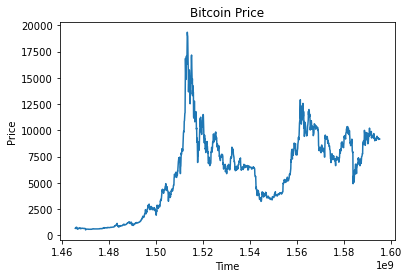

In [10]:
#Visualizing given data
plt.plot(bh['ds'], bh['y'])
plt.title('Bitcoin Price')
plt.ylabel('Price');
plt.xlabel('Time');
plt.show()

In [11]:
#Creating and fitting Model to data 
model = Prophet(interval_width=0.7)
model.fit(bh)

ParserError: year 1465689600 is out of range: 1465689600

In [15]:
#Creating future dates to predict(for 3 years or 36 months)
future_dates = model.make_future_dataframe(periods=1, freq='MS')
future_dates.tail()

,ds
1497,2020-07-18
1498,2020-07-19
1499,2020-07-20
1500,2020-07-21
1501,2020-08-01


In [16]:
#Forcasting Future Dates
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1497,2020-07-18,9200.591129,7820.827740,10678.051135
1498,2020-07-19,9177.577819,7797.218997,10592.363771
1499,2020-07-20,9197.090473,7816.056833,10661.459347
1500,2020-07-21,9177.296450,7762.426613,10635.150118
1501,2020-08-01,9150.622006,7736.885311,10693.902090


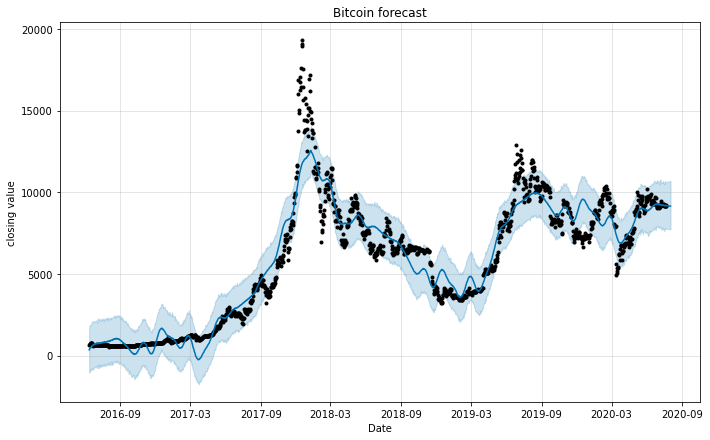

In [17]:
model.plot(forecast, xlabel = 'Date', ylabel = 'closing value', uncertainty=True)
plt.title('Bitcoin forecast')
plt.show();

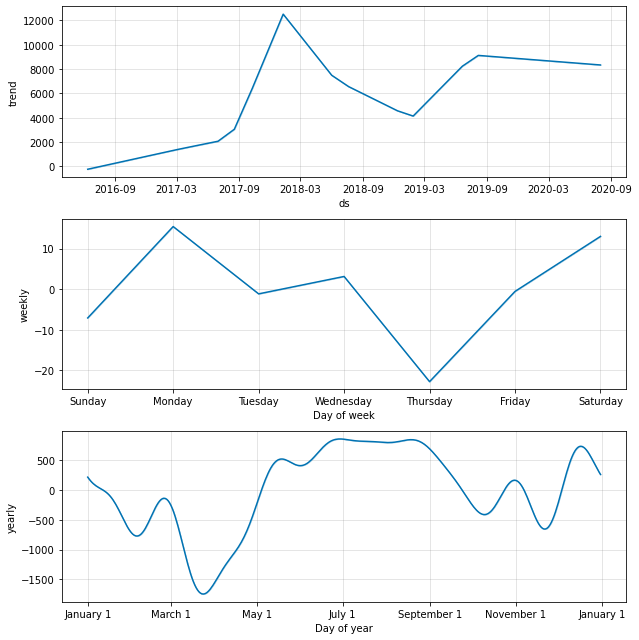

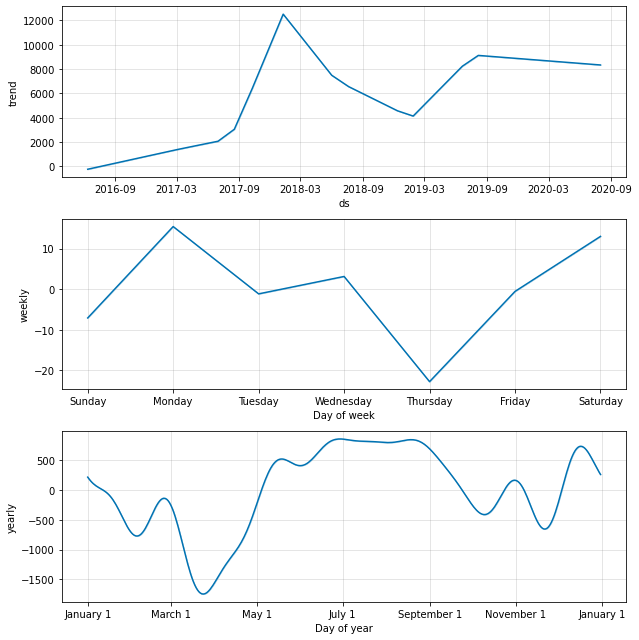

In [18]:
#Visualization in difftent time series
model.plot_components(forecast)

In [19]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

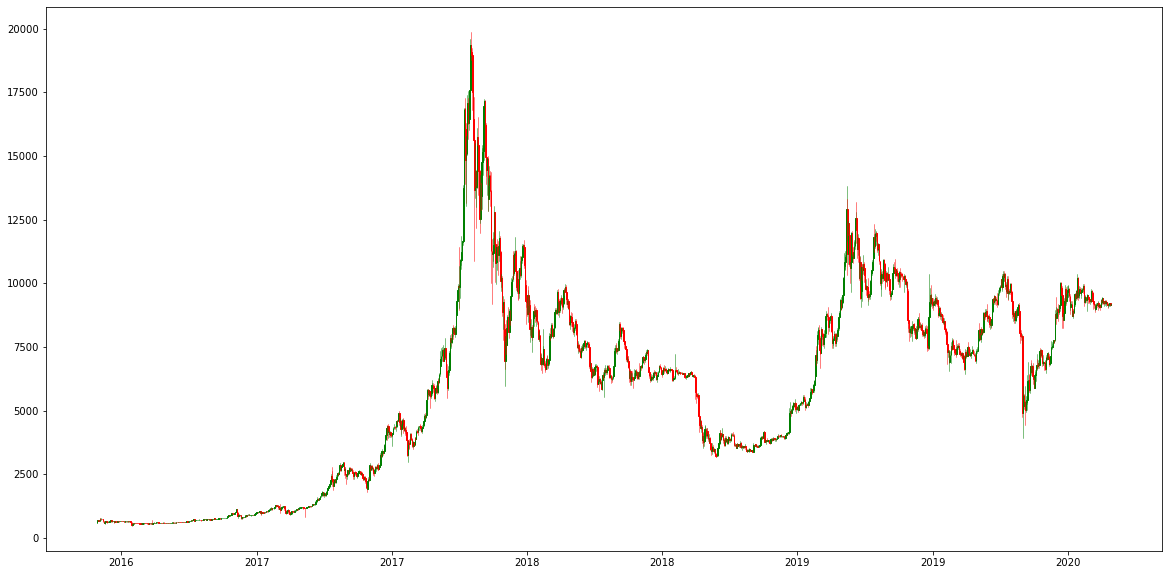

In [20]:
#Candelstick Open High Low Close (OHLC graph) for stock visualization 
import matplotlib.dates as mdates
import matplotlib.dates as mpl_dates
ohlc= bh[['ds', 'open', 'high', 'low','y']].copy()
ohlc['ds'] = ohlc['ds'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
f1, ax = plt.subplots(figsize = (20,10))
candlestick_ohlc(ax, ohlc.values, width=.9, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [21]:
metric_df = forecast.set_index('ds')[['yhat']].join(bh.set_index('ds').y).reset_index()
metric_df.ffill(inplace = True)
metric_df.tail()

,ds,yhat,y
1497,2020-07-18,9200.591129,9177.22
1498,2020-07-19,9177.577819,9216.02
1499,2020-07-20,9197.090473,9164.42
1500,2020-07-21,9177.296450,9175.09
1501,2020-08-01,9150.622006,9175.09


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2 = r2_score(metric_df.y, metric_df.yhat)
mse = mean_squared_error(metric_df.y, metric_df.yhat)
mae = mean_absolute_error(metric_df.y, metric_df.yhat)
print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % mse)
print('Test R2: %.6f' % r2)
print('Test MAE: %.6f' % mae)



Printing Mean Squared Error of Predictions...
Test MSE: 1216887.796149
Test R2: 0.912447
Test MAE: 750.889617
